In [1]:
'''
This file plots CMIP5 RCP - HIST over South Australia
/Users/earl/Desktop/Yang
and places the outputs in
/Users/earl/Dropbox/CMIP5/figures

Earl Duran 
created: 19-Mar-18
e.duran@unsw.edu.au
'''

import os
import xarray as xr
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import sys
import pickle
import itertools
def find_nearest_index(array, value):
    return int((np.abs(array - value)).argmin())
from scipy import interpolate


In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [2]:
os.system('sshfs \
erd561@raijin.nci.org.au:/g/data/e14/erd561/CMIP5/banksia/ \
/Users/earl/Desktop/bamboo')

256

In [4]:
with open('p05_index_and_pools.pkl', 'rb') as f:
    lat_warmN, lat_warmS, lon_warmW, lon_warmE, \
    SAM_index_sorted_cleaned, warm_pool_sorted_cleaned, wind_pool_sorted_cleaned = \
    pickle.load(f)

print(SAM_index_sorted_cleaned)

['IPSL-CM5A-MR', 'IPSL-CM5A-LR', 'GFDL-CM3', 'FGOALS-s2', 'CMCC-CMS', 'CMCC-CM', 'MPI-ESM-MR', 'GFDL-ESM2M', 'ACCESS1-0', 'MIROC-ESM', 'MIROC-ESM-CHEM', 'CanESM2', 'GFDL-ESM2G', 'ACCESS1-3', 'CSIRO-Mk3-6-0', 'HadGEM2-AO', 'MRI-ESM1', 'MRI-CGCM3', 'NorESM1-M', 'IPSL-CM5B-LR', 'CNRM-CM5']


In [5]:
script_name = nb_name[:-6]
print(script_name)
figures_path = '/Users/earl/Dropbox/CMIP5/figures/'

hist_uas_path = '/Users/earl/Desktop/bamboo/historical/mon/atmos/uas/latest/'
hist_vas_path = '/Users/earl/Desktop/bamboo/historical/mon/atmos/vas/latest/'
hist_uas_list = sorted(os.listdir(hist_uas_path))
hist_vas_list = sorted(os.listdir(hist_vas_path))

rcp85_uas_path = '/Users/earl/Desktop/bamboo/rcp85/mon/atmos/uas/latest/'
rcp85_vas_path = '/Users/earl/Desktop/bamboo/rcp85/mon/atmos/vas/latest/'
rcp85_uas_list = sorted(os.listdir(rcp85_uas_path))
rcp85_vas_list = sorted(os.listdir(rcp85_vas_path))


p09_get_uasvas_MMM


In [6]:
uas_hist = {}
uas_rcp85 = {}
uas_anom = {}
uas_lat = {}
uas_lon = {}

vas_hist = {}
vas_rcp85 = {}
vas_anom = {}
vas_lat = {}
vas_lon = {}

#model_n = 6
plot_list = sorted(SAM_index_sorted_cleaned)
print(plot_list)
#for model in plot_list[model_n-1:model_n]:
for model in plot_list:
    #print(model)
    # These models are hard to deal with:
    # MIROC5 and inmcm4 have a crazy rotated grid
    # MPI-ESM-LR has a weird grid too
    if model in ['MIROC5', 'MPI-ESM-LR', 'inmcm4']:
        continue
        
    if model in ['FGOALS-s2']:
        r = '2'
    else:
        r = '1'
    uas_rcp85_data = xr.open_dataset(
        rcp85_uas_path + model + '_r' + r + 'i1p1_2080-2099mean.nc', decode_times=False)
    vas_rcp85_data = xr.open_dataset(
        rcp85_vas_path + model + '_r' + r + 'i1p1_2080-2099mean.nc', decode_times=False)
    
    if model in ['FGOALS-s2']:
        r = '2'
    else:
        r = '1'
    uas_hist_data = xr.open_dataset(
        hist_uas_path + model + '_r' + r + 'i1p1_1980-1999mean.nc', decode_times=False)
    
    if model in ['EC-EARTH']:
        r = '2'
    vas_hist_data = xr.open_dataset(
        hist_vas_path + model + '_r' + r + 'i1p1_1980-1999mean.nc', decode_times=False)
    
    uas_hist[model] = uas_hist_data['uas'][0,:,:]
    uas_rcp85[model] = uas_rcp85_data['uas'][0,:,:]
    vas_hist[model] = vas_hist_data['vas'][0,:,:]
    vas_rcp85[model] = vas_rcp85_data['vas'][0,:,:]
    uas_anom[model] = uas_rcp85[model]-uas_hist[model]
    vas_anom[model] = vas_rcp85[model]-vas_hist[model]
    
    if len(uas_hist_data['lat'].shape) is 2:
        # MPI-ESM-LR and MPI-ESM-MR longitude index should be taken from the end
        if model in ['MPI-ESM-LR', 'MPI-ESM-MR']:
            uas_lat[model] = uas_hist_data['lat'][:,0]
            uas_lon[model] = uas_hist_data['lon'][-1,:]
        else:
            uas_lat[model] = uas_hist_data['lat'][:,0]
            uas_lon[model] = uas_hist_data['lon'][0,:]
    else:
        uas_lat[model] = uas_hist_data['lat'][:]
        uas_lon[model] = uas_hist_data['lon'][:]
        
    if len(vas_hist_data['lat'].shape) is 2:
        # MPI-ESM-LR and MPI-ESM-MR longitude index should be taken from the end
        if model in ['MPI-ESM-LR', 'MPI-ESM-MR']:
            vas_lat[model] = vas_hist_data['lat'][:,0]
            vas_lon[model] = vas_hist_data['lon'][-1,:]
        else:
            vas_lat[model] = vas_hist_data['lat'][:,0]
            vas_lon[model] = vas_hist_data['lon'][0,:]
    else:
        vas_lat[model] = vas_hist_data['lat'][:]
        vas_lon[model] = vas_hist_data['lon'][:]
    
    print(model + ' OK!')
        
# plt.subplot(3,2,1)
# plt.contourf(uas_anom[model])
# plt.subplot(3,2,2)
# plt.contourf(vas_anom[model])
# plt.subplot(3,2,3)
# plt.plot(uas_lon[model])
# plt.subplot(3,2,4)
# plt.plot(vas_lon[model])
# plt.subplot(3,2,5)
# plt.plot(uas_lat[model])
# plt.subplot(3,2,6)
# plt.plot(vas_lat[model])

['ACCESS1-0', 'ACCESS1-3', 'CMCC-CM', 'CMCC-CMS', 'CNRM-CM5', 'CSIRO-Mk3-6-0', 'CanESM2', 'FGOALS-s2', 'GFDL-CM3', 'GFDL-ESM2G', 'GFDL-ESM2M', 'HadGEM2-AO', 'IPSL-CM5A-LR', 'IPSL-CM5A-MR', 'IPSL-CM5B-LR', 'MIROC-ESM', 'MIROC-ESM-CHEM', 'MPI-ESM-MR', 'MRI-CGCM3', 'MRI-ESM1', 'NorESM1-M']
ACCESS1-0 OK!
ACCESS1-3 OK!
CMCC-CM OK!
CMCC-CMS OK!
CNRM-CM5 OK!
CSIRO-Mk3-6-0 OK!
CanESM2 OK!
FGOALS-s2 OK!
GFDL-CM3 OK!
GFDL-ESM2G OK!
GFDL-ESM2M OK!
HadGEM2-AO OK!
IPSL-CM5A-LR OK!
IPSL-CM5A-MR OK!
IPSL-CM5B-LR OK!
MIROC-ESM OK!
MIROC-ESM-CHEM OK!
MPI-ESM-MR OK!
MRI-CGCM3 OK!
MRI-ESM1 OK!
NorESM1-M OK!


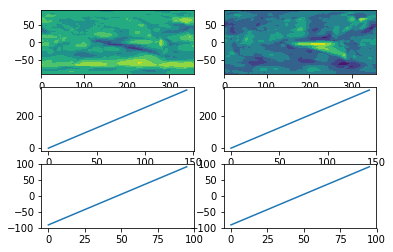

In [7]:
model_check = 'NorESM1-M'

#uas_anom[model_check] = uas_anom[model_check].where((uas_anom[model_check] != 0), np.nan)

plt.subplot(3,2,1)
plt.contourf(uas_lon[model_check], uas_lat[model_check], uas_anom[model_check])
plt.subplot(3,2,2)
plt.contourf(vas_lon[model_check], vas_lat[model_check], vas_anom[model_check])
plt.subplot(3,2,3)
plt.plot(uas_lon[model_check])
plt.subplot(3,2,4)
plt.plot(vas_lon[model_check])
plt.subplot(3,2,5)
plt.plot(uas_lat[model_check])
plt.subplot(3,2,6)
plt.plot(vas_lat[model_check])


In [8]:
# literally copy-pasted from /g/data1/v45/pas561/mom/archive/jra/v_10.2017.18Oct2017.ncra.nc

lat_unique = [-89.5700895506066, -89.013176131022, -88.452973836713, 
    -87.8920284453444, -87.3308011797376, -86.7694375145276, 
    -86.2079976214231, -85.6465108479528, -85.0849932009119, 
    -84.5234541489144, -83.9618996497181, -83.4003336387369, 
    -82.8387588197095, -82.2771771114337, -81.7155899132664, 
    -81.1539982697129, -80.5924029761777, -80.0308046490314, 
    -79.4692037732916, -78.9076007358379, -78.3459958490356, 
    -77.7843893678486, -77.2227815024451, -76.6611724276204, 
    -76.0995622899381, -75.5379512132081, -74.9763393027374, 
    -74.414726648662, -73.8531133285838, -73.2914994096763, 
    -72.7298849503795, -72.1682700017747, -71.6066546087075, 
    -71.0450388107113, -70.4834226427713, -69.9218061359604, 
    -69.3601893179717, -68.7985722135654, -68.2369548449477, 
    -67.6753372320917, -67.1137193930113, -66.5521013439961, 
    -65.9904830998127, -65.4288646738789, -64.8672460784143, 
    -64.3056273245713, -63.7440084225492, -63.1823893816941, 
    -62.6207702105861, -62.0591509171167, -61.4975315085564, 
    -60.9359119916146, -60.374292372493, -59.8126726569327, 
    -59.2510528502565, -58.6894329574061, -58.1278129829758, 
    -57.5661929312427, -57.0045728061936, -56.4429526115493, 
    -55.8813323507866, -55.3197120271579, -54.7580916437092, 
    -54.1964712032965, -53.6348507085999, -53.0732301621377, 
    -52.5116095662779, -51.9499889232498, -51.3883682351539, 
    -50.826747503971, -50.2651267315709, -49.70350591972, -49.1418850700887, 
    -48.5802641842574, -48.018643263723, -47.4570223099043, -46.895401324147, 
    -46.3337803077285, -45.7721592618623, -45.2105381877018, 
    -44.6489170863444, -44.0872959588346, -43.5256748061674, 
    -42.9640536292911, -42.4024324291106, -41.840811206489, 
    -41.2791899622508, -40.7175686971841, -40.1559474120422, 
    -39.5943261075457, -39.0327047843849, -38.4710834432205, 
    -37.909462084686, -37.3478407093888, -36.7862193179117, 
    -36.2245979108143, -35.6629764886338, -35.1013550518869, -34.53973360107, 
    -33.9781121366611, -33.4164906591199, -32.8548691688896, 
    -32.2932476663967, -31.7316261520529, -31.170004626255, 
    -30.6083830893861, -30.046761541816, -29.4851399839021, 
    -28.9235184159896, -28.3618968384127, -27.8002752514945, 
    -27.2386536555477, -26.6770320508754, -26.1154104377713, -25.55378881652, 
    -24.9921671873976, -24.4305455506723, -23.8689239066043, 
    -23.3073022554465, -22.7456805974447, -22.184058932838, 
    -21.6224372618593, -21.0608155847349, -20.4991939016857, 
    -19.9375722129269, -19.3759505186682, -18.8143288191145, 
    -18.2527071144658, -17.6910854049175, -17.1294636906605, 
    -16.5678419718816, -16.0062202487636, -15.4445985214858, 
    -14.8829767902235, -14.3213550551487, -13.7597333164304, 
    -13.1981115742342, -12.6364898287229, -12.0748680800568, 
    -11.5132463283931, -10.9516245738869, -10.3900028166909, 
    -9.8283810569556, -9.26675929482938, -8.70513753045879, 
    -8.14351576398856, -7.58189399556175, -7.02027222531985, 
    -6.45865045340296, -5.89702867994979, -5.33540690509796, 
    -4.77378512898387, -4.21216335174302, -3.65054157350999, 
    -3.08891979441865, -2.52729801460213, -1.96567623419308, 
    -1.40405445332361, -0.842432672125539, -0.280810890730407, 
    0.280810890730407, 0.842432672125539, 1.40405445332361, 1.96567623419308, 
    2.52729801460213, 3.08891979441865, 3.65054157350999, 4.21216335174302, 
    4.77378512898387, 5.33540690509796, 5.89702867994979, 6.45865045340296, 
    7.02027222531985, 7.58189399556175, 8.14351576398856, 8.70513753045879, 
    9.26675929482938, 9.8283810569556, 10.3900028166909, 10.9516245738869, 
    11.5132463283931, 12.0748680800568, 12.6364898287229, 13.1981115742342, 
    13.7597333164304, 14.3213550551487, 14.8829767902235, 15.4445985214858, 
    16.0062202487636, 16.5678419718816, 17.1294636906605, 17.6910854049175, 
    18.2527071144658, 18.8143288191145, 19.3759505186682, 19.9375722129269, 
    20.4991939016857, 21.0608155847349, 21.6224372618593, 22.184058932838, 
    22.7456805974447, 23.3073022554465, 23.8689239066043, 24.4305455506723, 
    24.9921671873976, 25.55378881652, 26.1154104377713, 26.6770320508754, 
    27.2386536555477, 27.8002752514945, 28.3618968384127, 28.9235184159896, 
    29.4851399839021, 30.046761541816, 30.6083830893861, 31.170004626255, 
    31.7316261520529, 32.2932476663967, 32.8548691688896, 33.4164906591199, 
    33.9781121366611, 34.53973360107, 35.1013550518869, 35.6629764886338, 
    36.2245979108143, 36.7862193179117, 37.3478407093888, 37.909462084686, 
    38.4710834432205, 39.0327047843849, 39.5943261075457, 40.1559474120422, 
    40.7175686971841, 41.2791899622508, 41.840811206489, 42.4024324291106, 
    42.9640536292911, 43.5256748061674, 44.0872959588346, 44.6489170863444, 
    45.2105381877018, 45.7721592618623, 46.3337803077285, 46.895401324147, 
    47.4570223099043, 48.018643263723, 48.5802641842574, 49.1418850700887, 
    49.70350591972, 50.2651267315709, 50.826747503971, 51.3883682351539, 
    51.9499889232498, 52.5116095662779, 53.0732301621377, 53.6348507085999, 
    54.1964712032965, 54.7580916437092, 55.3197120271579, 55.8813323507866, 
    56.4429526115493, 57.0045728061936, 57.5661929312427, 58.1278129829758, 
    58.6894329574061, 59.2510528502565, 59.8126726569327, 60.374292372493, 
    60.9359119916146, 61.4975315085564, 62.0591509171167, 62.6207702105861, 
    63.1823893816941, 63.7440084225492, 64.3056273245713, 64.8672460784143, 
    65.4288646738789, 65.9904830998127, 66.5521013439961, 67.1137193930113, 
    67.6753372320917, 68.2369548449477, 68.7985722135654, 69.3601893179717, 
    69.9218061359604, 70.4834226427713, 71.0450388107113, 71.6066546087075, 
    72.1682700017747, 72.7298849503795, 73.2914994096763, 73.8531133285838, 
    74.414726648662, 74.9763393027374, 75.5379512132081, 76.0995622899381, 
    76.6611724276204, 77.2227815024451, 77.7843893678486, 78.3459958490356, 
    78.9076007358379, 79.4692037732916, 80.0308046490314, 80.5924029761777, 
    81.1539982697129, 81.7155899132664, 82.2771771114337, 82.8387588197095, 
    83.4003336387369, 83.9618996497181, 84.5234541489144, 85.0849932009119, 
    85.6465108479528, 86.2079976214231, 86.7694375145276, 87.3308011797376, 
    87.8920284453444, 88.452973836713, 89.013176131022, 89.5700895506066]

lon_unique = [0, 0.5625, 1.125, 1.6875, 2.25, 2.8125, 3.375, 3.9375, 4.5, 
    5.0625, 5.625, 6.1875, 6.75, 7.3125, 7.875, 8.4375, 9, 9.5625, 10.125, 
    10.6875, 11.25, 11.8125, 12.375, 12.9375, 13.5, 14.0625, 14.625, 15.1875, 
    15.75, 16.3125, 16.875, 17.4375, 18, 18.5625, 19.125, 19.6875, 20.25, 
    20.8125, 21.375, 21.9375, 22.5, 23.0625, 23.625, 24.1875, 24.75, 25.3125, 
    25.875, 26.4375, 27, 27.5625, 28.125, 28.6875, 29.25, 29.8125, 30.375, 
    30.9375, 31.5, 32.0625, 32.625, 33.1875, 33.75, 34.3125, 34.875, 35.4375, 
    36, 36.5625, 37.125, 37.6875, 38.25, 38.8125, 39.375, 39.9375, 40.5, 
    41.0625, 41.625, 42.1875, 42.75, 43.3125, 43.875, 44.4375, 45, 45.5625, 
    46.125, 46.6875, 47.25, 47.8125, 48.375, 48.9375, 49.5, 50.0625, 50.625, 
    51.1875, 51.75, 52.3125, 52.875, 53.4375, 54, 54.5625, 55.125, 55.6875, 
    56.25, 56.8125, 57.375, 57.9375, 58.5, 59.0625, 59.625, 60.1875, 60.75, 
    61.3125, 61.875, 62.4375, 63, 63.5625, 64.125, 64.6875, 65.25, 65.8125, 
    66.375, 66.9375, 67.5, 68.0625, 68.625, 69.1875, 69.75, 70.3125, 70.875, 
    71.4375, 72, 72.5625, 73.125, 73.6875, 74.25, 74.8125, 75.375, 75.9375, 
    76.5, 77.0625, 77.625, 78.1875, 78.75, 79.3125, 79.875, 80.4375, 81, 
    81.5625, 82.125, 82.6875, 83.25, 83.8125, 84.375, 84.9375, 85.5, 86.0625, 
    86.625, 87.1875, 87.75, 88.3125, 88.875, 89.4375, 90, 90.5625, 91.125, 
    91.6875, 92.25, 92.8125, 93.375, 93.9375, 94.5, 95.0625, 95.625, 96.1875, 
    96.75, 97.3125, 97.875, 98.4375, 99, 99.5625, 100.125, 100.6875, 101.25, 
    101.8125, 102.375, 102.9375, 103.5, 104.0625, 104.625, 105.1875, 105.75, 
    106.3125, 106.875, 107.4375, 108, 108.5625, 109.125, 109.6875, 110.25, 
    110.8125, 111.375, 111.9375, 112.5, 113.0625, 113.625, 114.1875, 114.75, 
    115.3125, 115.875, 116.4375, 117, 117.5625, 118.125, 118.6875, 119.25, 
    119.8125, 120.375, 120.9375, 121.5, 122.0625, 122.625, 123.1875, 123.75, 
    124.3125, 124.875, 125.4375, 126, 126.5625, 127.125, 127.6875, 128.25, 
    128.8125, 129.375, 129.9375, 130.5, 131.0625, 131.625, 132.1875, 132.75, 
    133.3125, 133.875, 134.4375, 135, 135.5625, 136.125, 136.6875, 137.25, 
    137.8125, 138.375, 138.9375, 139.5, 140.0625, 140.625, 141.1875, 141.75, 
    142.3125, 142.875, 143.4375, 144, 144.5625, 145.125, 145.6875, 146.25, 
    146.8125, 147.375, 147.9375, 148.5, 149.0625, 149.625, 150.1875, 150.75, 
    151.3125, 151.875, 152.4375, 153, 153.5625, 154.125, 154.6875, 155.25, 
    155.8125, 156.375, 156.9375, 157.5, 158.0625, 158.625, 159.1875, 159.75, 
    160.3125, 160.875, 161.4375, 162, 162.5625, 163.125, 163.6875, 164.25, 
    164.8125, 165.375, 165.9375, 166.5, 167.0625, 167.625, 168.1875, 168.75, 
    169.3125, 169.875, 170.4375, 171, 171.5625, 172.125, 172.6875, 173.25, 
    173.8125, 174.375, 174.9375, 175.5, 176.0625, 176.625, 177.1875, 177.75, 
    178.3125, 178.875, 179.4375, 180, 180.5625, 181.125, 181.6875, 182.25, 
    182.8125, 183.375, 183.9375, 184.5, 185.0625, 185.625, 186.1875, 186.75, 
    187.3125, 187.875, 188.4375, 189, 189.5625, 190.125, 190.6875, 191.25, 
    191.8125, 192.375, 192.9375, 193.5, 194.0625, 194.625, 195.1875, 195.75, 
    196.3125, 196.875, 197.4375, 198, 198.5625, 199.125, 199.6875, 200.25, 
    200.8125, 201.375, 201.9375, 202.5, 203.0625, 203.625, 204.1875, 204.75, 
    205.3125, 205.875, 206.4375, 207, 207.5625, 208.125, 208.6875, 209.25, 
    209.8125, 210.375, 210.9375, 211.5, 212.0625, 212.625, 213.1875, 213.75, 
    214.3125, 214.875, 215.4375, 216, 216.5625, 217.125, 217.6875, 218.25, 
    218.8125, 219.375, 219.9375, 220.5, 221.0625, 221.625, 222.1875, 222.75, 
    223.3125, 223.875, 224.4375, 225, 225.5625, 226.125, 226.6875, 227.25, 
    227.8125, 228.375, 228.9375, 229.5, 230.0625, 230.625, 231.1875, 231.75, 
    232.3125, 232.875, 233.4375, 234, 234.5625, 235.125, 235.6875, 236.25, 
    236.8125, 237.375, 237.9375, 238.5, 239.0625, 239.625, 240.1875, 240.75, 
    241.3125, 241.875, 242.4375, 243, 243.5625, 244.125, 244.6875, 245.25, 
    245.8125, 246.375, 246.9375, 247.5, 248.0625, 248.625, 249.1875, 249.75, 
    250.3125, 250.875, 251.4375, 252, 252.5625, 253.125, 253.6875, 254.25, 
    254.8125, 255.375, 255.9375, 256.5, 257.0625, 257.625, 258.1875, 258.75, 
    259.3125, 259.875, 260.4375, 261, 261.5625, 262.125, 262.6875, 263.25, 
    263.8125, 264.375, 264.9375, 265.5, 266.0625, 266.625, 267.1875, 267.75, 
    268.3125, 268.875, 269.4375, 270, 270.5625, 271.125, 271.6875, 272.25, 
    272.8125, 273.375, 273.9375, 274.5, 275.0625, 275.625, 276.1875, 276.75, 
    277.3125, 277.875, 278.4375, 279, 279.5625, 280.125, 280.6875, 281.25, 
    281.8125, 282.375, 282.9375, 283.5, 284.0625, 284.625, 285.1875, 285.75, 
    286.3125, 286.875, 287.4375, 288, 288.5625, 289.125, 289.6875, 290.25, 
    290.8125, 291.375, 291.9375, 292.5, 293.0625, 293.625, 294.1875, 294.75, 
    295.3125, 295.875, 296.4375, 297, 297.5625, 298.125, 298.6875, 299.25, 
    299.8125, 300.375, 300.9375, 301.5, 302.0625, 302.625, 303.1875, 303.75, 
    304.3125, 304.875, 305.4375, 306, 306.5625, 307.125, 307.6875, 308.25, 
    308.8125, 309.375, 309.9375, 310.5, 311.0625, 311.625, 312.1875, 312.75, 
    313.3125, 313.875, 314.4375, 315, 315.5625, 316.125, 316.6875, 317.25, 
    317.8125, 318.375, 318.9375, 319.5, 320.0625, 320.625, 321.1875, 321.75, 
    322.3125, 322.875, 323.4375, 324, 324.5625, 325.125, 325.6875, 326.25, 
    326.8125, 327.375, 327.9375, 328.5, 329.0625, 329.625, 330.1875, 330.75, 
    331.3125, 331.875, 332.4375, 333, 333.5625, 334.125, 334.6875, 335.25, 
    335.8125, 336.375, 336.9375, 337.5, 338.0625, 338.625, 339.1875, 339.75, 
    340.3125, 340.875, 341.4375, 342, 342.5625, 343.125, 343.6875, 344.25, 
    344.8125, 345.375, 345.9375, 346.5, 347.0625, 347.625, 348.1875, 348.75, 
    349.3125, 349.875, 350.4375, 351, 351.5625, 352.125, 352.6875, 353.25, 
    353.8125, 354.375, 354.9375, 355.5, 356.0625, 356.625, 357.1875, 357.75, 
    358.3125, 358.875, 359.4375]

#print(lon_unique)

In [9]:
grid_lon_unique, grid_lat_unique = np.meshgrid(lon_unique,lat_unique)
print(np.shape(grid_lon_unique))

uas_hist_unique = []
vas_hist_unique = []
uas_rcp85_unique = []
vas_rcp85_unique = []

for idx, t in enumerate(plot_list):
    print(t)
    
    uas_grid_lon_now, uas_grid_lat_now = np.meshgrid(
        uas_lon[t], uas_lat[t])
    print(uas_grid_lon_now.shape)
    print(uas_grid_lat_now.shape)
    uas_lon_flat = np.transpose(uas_grid_lon_now.flatten('F'))
    uas_lat_flat = uas_grid_lat_now.flatten('F')
    uas_flat_list = [uas_lon_flat, uas_lat_flat]    
    uas_grid_points = np.transpose(uas_flat_list)
    print(np.shape(uas_grid_points))
    uas_hist_now = uas_hist[t]
    uas_rcp85_now = uas_rcp85[t]
    
    vas_grid_lon_now, vas_grid_lat_now = np.meshgrid(
        vas_lon[t], vas_lat[t])
    vas_lon_flat = np.transpose(vas_grid_lon_now.flatten('F'))
    vas_lat_flat = vas_grid_lat_now.flatten('F')
    vas_flat_list = [vas_lon_flat, vas_lat_flat]    
    vas_grid_points = np.transpose(vas_flat_list)
    vas_hist_now = vas_hist[t]
    vas_rcp85_now = vas_rcp85[t]

#     if t in ['CSIRO-Mk3-6-0', 'CanESM2', 'FGOALS-s2', 'HadGEM2-AO', 'MIROC-ESM-CHEM', 'MIROC-ESM']:
#         uas_anom_now_flatten = uas_anom_now.stack(z=('lon', 'lat'))
#         vas_anom_now_flatten = vas_anom_now.stack(z=('lon', 'lat'))
#     elif t in ['GFDL-CM3', 'GFDL-ESM2G', 'GFDL-ESM2M', 'MRI-CGCM3', 'MRI-ESM1']:
#         uas_anom_now_flatten = uas_anom_now.stack(z=('rlon', 'rlat'))
#         vas_anom_now_flatten = vas_anom_now.stack(z=('rlon', 'rlat'))
#     elif t in ['MPI-ESM-MR']:
#         uas_anom_now_flatten = uas_anom_now.flatten('F')
#         vas_anom_now_flatten = vas_anom_now.flatten('F')
#     else:
    uas_hist_now_flatten = uas_hist_now.stack(z=('lon', 'lat'))
    vas_hist_now_flatten = vas_hist_now.stack(z=('lon', 'lat'))
    uas_rcp85_now_flatten = uas_rcp85_now.stack(z=('lon', 'lat'))
    vas_rcp85_now_flatten = vas_rcp85_now.stack(z=('lon', 'lat'))
    
    print(np.shape(uas_hist_now_flatten))
    
    uas_hist_interp = interpolate.griddata(uas_grid_points, uas_hist_now_flatten, 
                                           (grid_lon_unique, grid_lat_unique), 
                                           method='linear')
    vas_hist_interp = interpolate.griddata(vas_grid_points, vas_hist_now_flatten, 
                                           (grid_lon_unique, grid_lat_unique), 
                                           method='linear')
    uas_rcp85_interp = interpolate.griddata(uas_grid_points, uas_rcp85_now_flatten, 
                                           (grid_lon_unique, grid_lat_unique), 
                                           method='linear')
    vas_rcp85_interp = interpolate.griddata(vas_grid_points, vas_rcp85_now_flatten, 
                                           (grid_lon_unique, grid_lat_unique), 
                                           method='linear')
    if idx == 0:
        uas_hist_unique = uas_hist_interp
        vas_hist_unique = vas_hist_interp
        uas_rcp85_unique = uas_rcp85_interp
        vas_rcp85_unique = vas_rcp85_interp
    else:
        uas_hist_unique = np.dstack((uas_hist_unique, uas_hist_interp))
        vas_hist_unique = np.dstack((vas_hist_unique, vas_hist_interp)) 
        uas_rcp85_unique = np.dstack((uas_rcp85_unique, uas_rcp85_interp))
        vas_rcp85_unique = np.dstack((vas_rcp85_unique, vas_rcp85_interp)) 
    

(320, 640)
ACCESS1-0
(144, 192)
(144, 192)
(27648, 2)
(27648,)
ACCESS1-3
(144, 192)
(144, 192)
(27648, 2)
(27648,)
CMCC-CM
(240, 480)
(240, 480)
(115200, 2)
(115200,)
CMCC-CMS
(96, 192)
(96, 192)
(18432, 2)
(18432,)
CNRM-CM5
(128, 256)
(128, 256)
(32768, 2)
(32768,)
CSIRO-Mk3-6-0
(96, 192)
(96, 192)
(18432, 2)
(18432,)
CanESM2
(64, 128)
(64, 128)
(8192, 2)
(8192,)
FGOALS-s2
(108, 128)
(108, 128)
(13824, 2)
(13824,)
GFDL-CM3
(90, 144)
(90, 144)
(12960, 2)
(12960,)
GFDL-ESM2G
(90, 144)
(90, 144)
(12960, 2)
(12960,)
GFDL-ESM2M
(90, 144)
(90, 144)
(12960, 2)
(12960,)
HadGEM2-AO
(144, 192)
(144, 192)
(27648, 2)
(27648,)
IPSL-CM5A-LR
(96, 96)
(96, 96)
(9216, 2)
(9216,)
IPSL-CM5A-MR
(143, 144)
(143, 144)
(20592, 2)
(20592,)
IPSL-CM5B-LR
(96, 96)
(96, 96)
(9216, 2)
(9216,)
MIROC-ESM
(64, 128)
(64, 128)
(8192, 2)
(8192,)
MIROC-ESM-CHEM
(64, 128)
(64, 128)
(8192, 2)
(8192,)
MPI-ESM-MR
(96, 192)
(96, 192)
(18432, 2)
(18432,)
MRI-CGCM3
(160, 320)
(160, 320)
(51200, 2)
(51200,)
MRI-ESM1
(160, 320)


lat: -89.5700895506066
lat: -89.013176131022
lat: -88.452973836713
lat: -87.8920284453444
lat: -87.3308011797376
lat: -86.7694375145276
lat: -86.2079976214231
lat: -85.6465108479528
lat: -85.0849932009119
lat: -84.5234541489144
lat: -83.9618996497181
lat: -83.4003336387369
lat: -82.8387588197095
lat: -82.2771771114337
lat: -81.7155899132664
lat: -81.1539982697129
lat: -80.5924029761777
lat: -80.0308046490314
lat: -79.4692037732916
lat: -78.9076007358379
lat: -78.3459958490356
lat: -77.7843893678486
lat: -77.2227815024451
lat: -76.6611724276204
lat: -76.0995622899381
lat: -75.5379512132081
lat: -74.9763393027374
lat: -74.414726648662
lat: -73.8531133285838
lat: -73.2914994096763
lat: -72.7298849503795
lat: -72.1682700017747
lat: -71.6066546087075
lat: -71.0450388107113
lat: -70.4834226427713
lat: -69.9218061359604
lat: -69.3601893179717
lat: -68.7985722135654
lat: -68.2369548449477
lat: -67.6753372320917
lat: -67.1137193930113
lat: -66.5521013439961
lat: -65.9904830998127
lat: -65.42886

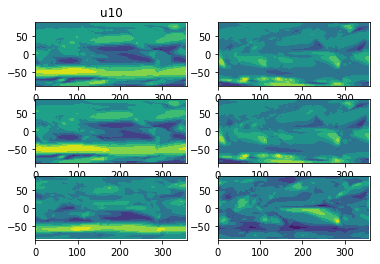

In [10]:
# Criteria for MMM:
# good_tol = 12

uas_hist_MMM = np.empty([len(lat_unique),len(lon_unique)])
vas_hist_MMM = np.empty([len(lat_unique),len(lon_unique)])
uas_rcp85_MMM = np.empty([len(lat_unique),len(lon_unique)])
vas_rcp85_MMM = np.empty([len(lat_unique),len(lon_unique)])
for y_idx,y in enumerate(lat_unique):
    print('lat: ' + str(y))
    
    for x_idx, x in enumerate(lon_unique):
        uas_hist_unique_now = uas_hist_unique[y_idx][x_idx]
        vas_hist_unique_now = vas_hist_unique[y_idx][x_idx]
        uas_rcp85_unique_now = uas_rcp85_unique[y_idx][x_idx]
        vas_rcp85_unique_now = vas_rcp85_unique[y_idx][x_idx]
        #print(uas_unique_now)
        #print(np.shape(uas_unique_now))
        #uas_idx = np.argwhere(np.isnan(uas_unique_now))
        #vas_idx = np.argwhere(np.isnan(vas_unique_now))
        #print(idx)
        #print(len(idx))
#         if len(uas_idx) <= good_tol:
#             uas_anom_MMM[y_idx, x_idx] = np.nanmean(uas_unique_now)
#         else:
#             uas_anom_MMM[y_idx, x_idx] = np.mean(uas_unique_now)
#         if len(vas_idx) <= good_tol:
#             vas_anom_MMM[y_idx, x_idx] = np.nanmean(vas_unique_now)
#         else:
#             vas_anom_MMM[y_idx, x_idx] = np.mean(vas_unique_now)
        uas_hist_MMM[y_idx, x_idx] = np.mean(uas_hist_unique_now)
        uas_rcp85_MMM[y_idx, x_idx] = np.mean(uas_rcp85_unique_now)
        vas_hist_MMM[y_idx, x_idx] = np.mean(vas_hist_unique_now)
        vas_rcp85_MMM[y_idx, x_idx] = np.mean(vas_rcp85_unique_now)

            
plt.subplot(3,2,1)
plt.contourf(lon_unique, lat_unique, uas_hist_MMM)
plt.title('u10')
plt.subplot(3,2,2)
plt.contourf(lon_unique, lat_unique, vas_hist_MMM)
plt.subplot(3,2,3)
plt.contourf(lon_unique, lat_unique, uas_rcp85_MMM)
plt.subplot(3,2,4)
plt.contourf(lon_unique, lat_unique, vas_rcp85_MMM)
plt.subplot(3,2,5)
plt.contourf(lon_unique, lat_unique, uas_rcp85_MMM-uas_hist_MMM)
plt.subplot(3,2,6)
plt.contourf(lon_unique, lat_unique, vas_rcp85_MMM-vas_hist_MMM)

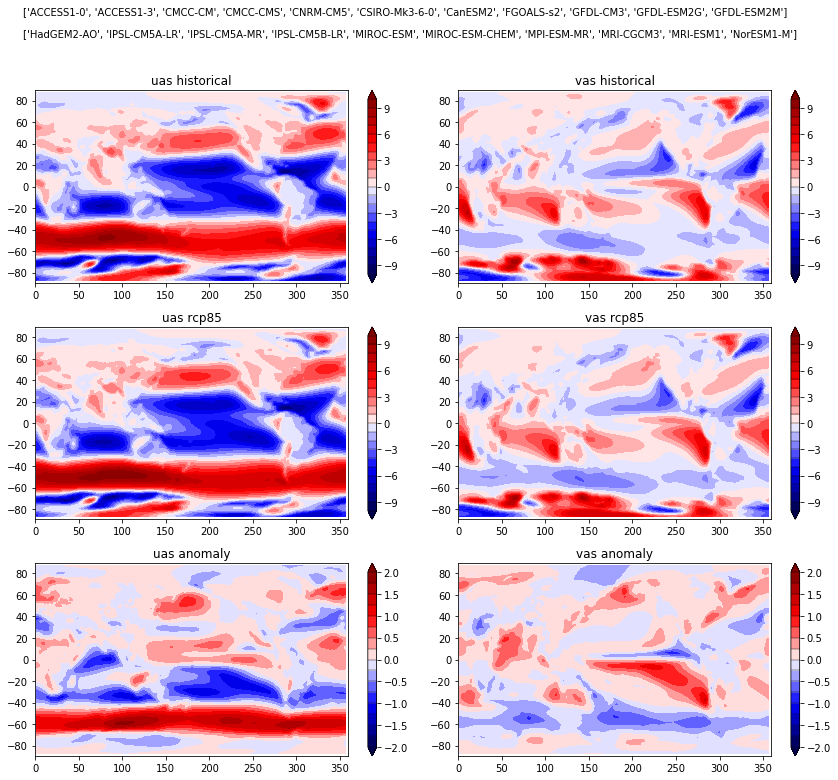

In [11]:
fig = plt.figure() 
fig.set_size_inches(12, 10)

plt.subplot(3,2,1)
cmap = plt.get_cmap('seismic')
step = 1
contf_lvls = np.arange(-10,10+1e-08,step)  
contf = plt.contourf(lon_unique, lat_unique, uas_hist_MMM, contf_lvls, cmap=cmap, extend='both')
cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
plt.title('uas historical')

plt.subplot(3,2,2)
cmap = plt.get_cmap('seismic')
step = 1
contf_lvls = np.arange(-10,10+1e-08,step)
contf = plt.contourf(lon_unique, lat_unique, vas_hist_MMM, contf_lvls, cmap=cmap, extend='both')
cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
plt.title('vas historical')

plt.subplot(3,2,3)
cmap = plt.get_cmap('seismic')
step = 1
contf_lvls = np.arange(-10,10+1e-08,step)
contf = plt.contourf(lon_unique, lat_unique, uas_rcp85_MMM, contf_lvls, cmap=cmap, extend='both')
cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
plt.title('uas rcp85')

plt.subplot(3,2,4)
cmap = plt.get_cmap('seismic')
step = 1
contf_lvls = np.arange(-10,10+1e-08,step)
contf = plt.contourf(lon_unique, lat_unique, vas_rcp85_MMM, contf_lvls, cmap=cmap, extend='both')
cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
plt.title('vas rcp85')

plt.subplot(3,2,5)
cmap = plt.get_cmap('seismic')
step = 0.25
contf_lvls = np.arange(-2,2+1e-08,step)
contf = plt.contourf(lon_unique, lat_unique, uas_rcp85_MMM-uas_hist_MMM, contf_lvls, cmap=cmap, extend='both')
cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
plt.title('uas anomaly')

plt.subplot(3,2,6)
cmap = plt.get_cmap('seismic')
step = 0.25
contf_lvls = np.arange(-2,2+1e-08,step) 
contf = plt.contourf(lon_unique, lat_unique, vas_rcp85_MMM-vas_hist_MMM, contf_lvls, cmap=cmap, extend='both')
cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
plt.title('vas anomaly')

plt.text(-500,600,plot_list[:11])
plt.text(-500,580,plot_list[11:])
plt.tight_layout()

output_ls = os.listdir(figures_path)
if not script_name:
    script_name = 'test'
elif script_name not in output_ls:
    os.mkdir(figures_path + '/' + script_name)
plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
            + '_fig1_' + '.png', bbox_inches='tight', dpi=200)


ACCESS1-0
ACCESS1-3
CMCC-CM
CMCC-CMS
CNRM-CM5
CSIRO-Mk3-6-0
CanESM2
FGOALS-s2
GFDL-CM3
GFDL-ESM2G
GFDL-ESM2M
HadGEM2-AO
IPSL-CM5A-LR
IPSL-CM5A-MR
IPSL-CM5B-LR
MIROC-ESM
MIROC-ESM-CHEM
MPI-ESM-MR
MRI-CGCM3
MRI-ESM1
NorESM1-M


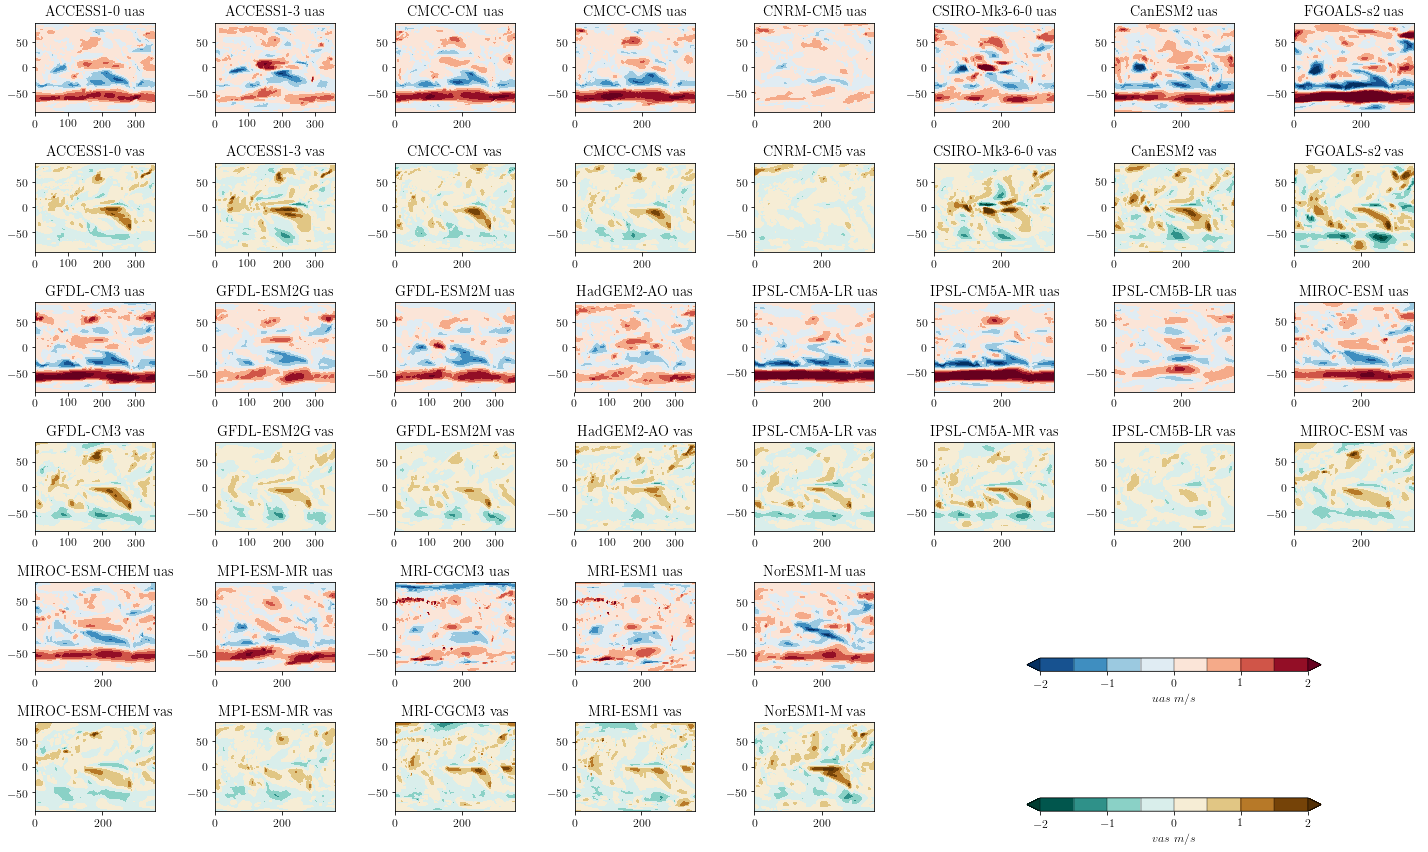

In [14]:
matplotlib.rcParams.update({'font.size': 12}) 
row = 6
col = 8
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.close('all')
fig = plt.figure() 
fig.set_size_inches(20, 12)

count = -1
p = 0
for idx, dum in enumerate(SAM_index_sorted_cleaned):
    print(plot_list[idx])
    t = plot_list[idx]
    count += 1
    if count is col:
        count = 0
        p += 1
    
    ax = plt.subplot2grid((row, col), (p*2, count))
    cmap = plt.get_cmap('RdBu_r')
    step = 0.5
    contf_lvls = np.arange(-2,2+1e-08,step)           
    ax.set_facecolor('grey')
    contf = plt.contourf(uas_lon[t], uas_lat[t],
        uas_anom[t], contf_lvls, cmap=cmap, extend='both')
    ax.set_title(t + ' uas')
    if idx == len(SAM_index_sorted_cleaned)-1:
        ax = plt.subplot2grid((row, col), (p*2, count+1), colspan=3)
        cbar = plt.colorbar(contf, orientation='horizontal', drawedges=True)
        cbar.set_label(r'$uas$ $m/s$') 
        cbar.set_ticks(contf_lvls[np.arange(0,np.size(contf_lvls),2)])
        plt.axis('off')
        
    ax = plt.subplot2grid((row, col), (1+p*2, count))
    cmap = plt.get_cmap('BrBG_r')
    step = 0.5
    contf_lvls = np.arange(-2,2+1e-08,step) 
    ax.set_facecolor('grey')
    contf = plt.contourf(vas_lon[t], vas_lat[t], vas_anom[t], contf_lvls, cmap=cmap, extend='both')
    ax.set_title(t + ' vas')
    if idx == len(SAM_index_sorted_cleaned)-1:
        ax = plt.subplot2grid((row, col), (1+p*2, count+1), colspan=3)
        cbar = plt.colorbar(contf, orientation='horizontal', drawedges=True)
        cbar.set_label(r'$vas$ $m/s$') 
        cbar.set_ticks(contf_lvls[np.arange(0,np.size(contf_lvls),2)])
        plt.axis('off')
    
plt.tight_layout()

output_ls = os.listdir(figures_path)
if not script_name:
    script_name = 'test'
elif script_name not in output_ls:
    os.mkdir(figures_path + '/' + script_name)
plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
            + '_fig2_' + '.png', bbox_inches='tight', dpi=200)
    

with open(script_name + '.pkl', 'wb') as f:
    pickle.dump([uas_hist_MMM, vas_hist_MMM, uas_rcp85_MMM, vas_rcp85_MMM], f)